# Boosted Gradient

## Libraries

In [72]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

## Import the data

In [5]:
boston = load_boston()
# House Prices
y = boston.target
# The other 13 features
X = boston.data

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

In [7]:
rf = RandomForestRegressor(n_estimators=100,
                            n_jobs=-1,
                            random_state=1)

gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

abr = AdaBoostRegressor(DecisionTreeRegressor(),
                         learning_rate=0.1,
                         loss='linear',
                         n_estimators=100,
                         random_state=1)

In [25]:
models = [rf, gdbr, abr]

In [197]:
def models_cv(X_train, y_train, kfolds = 5):
    
    MSE = []
    R2 = []
    
    MSE.append(-np.mean(cross_val_score(rf,X_train, y_train, cv = kfolds, scoring = 'neg_mean_squared_error')))
    MSE.append(-np.mean(cross_val_score(gdbr,X_train, y_train, cv = kfolds, scoring = 'neg_mean_squared_error')))
    MSE.append(-np.mean(cross_val_score(abr,X_train, y_train, cv = kfolds, scoring = 'neg_mean_squared_error')))
    R2.append(np.mean(cross_val_score(rf, X_train, y_train, cv = kfolds, scoring = 'r2')))
    R2.append(np.mean(cross_val_score(gdbr, X_train, y_train, cv = kfolds, scoring = 'r2')))
    R2.append(np.mean(cross_val_score(abr, X_train, y_train, cv = kfolds, scoring = 'r2')))
    
    return MSE, R2 

In [198]:
MSE, R2 = models_cv(X_train, y_train, 5)


print('RandomForestRegressor     Train CV| MSE: ', round(MSE[0],2) ,' | R2: ',round(R2[0],2))
print('GradientBoostingregressor Train CV| MSE: ', round(MSE[1],2) ,' | R2: ',round(R2[1],2))
print('AdaBoostRegressot         Train CV| MSE: ', round(MSE[2],2) ,' | R2: ', round(R2[2],2))
    

RandomForestRegressor     Train CV| MSE:  9.8  | R2:  0.87
GradientBoostingregressor Train CV| MSE:  10.86  | R2:  0.86
AdaBoostRegressot         Train CV| MSE:  9.54  | R2:  0.88


In [82]:
gdbr = GradientBoostingRegressor(learning_rate=1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

In [163]:
MSE = models_cv(X_train, y_train)

RandomForestRegressor     Train CV| MSE:  9.8  | R2:  0.87
GradientBoostingregressor Train CV| MSE:  10.86  | R2:  0.86
AdaBoostRegressot         Train CV| MSE:  9.54  | R2:  0.88


In [191]:
def stage_score_plot(estimator, X_train, y_train, X_test, y_test):
    '''
    Parameters: estimator: GradientBoostingRegressor or AdaBoostRegressor
                X_train: 2d numpy array
                y_train: 1d numpy array
                X_test: 2d numpy array
                y_test: 1d numpy array

    Returns: A plot of the number of iterations vs the MSE for the model for
    both the training set and test set.
    '''
   
    r = estimator.fit(X_train, y_train) 
    pred_train = list(r.staged_predict(X_train))
    pred_test = list(r.staged_predict(X_test))
    score_train = np.zeros(len(pred_train))
    score_test = np.zeros(len(pred_test))
    
    
    for n,i in enumerate(pred_train):
        
        score_train[n] = mean_squared_error(y_train, pred_train[n])
        
    for n,i in enumerate(pred_train):
        
        score_test[n] = mean_squared_error(y_test, pred_test[n])
        
    plt.plot(np.arange(score_train.shape[0]), score_train, label=(str(estimator.__class__.__name__)+' Training Error'))
    plt.plot(np.arange(score_test.shape[0]), score_test, label=(str(estimator.__class__.__name__)+' Testing Error'))
    plt.legend(loc='upper right')    
        

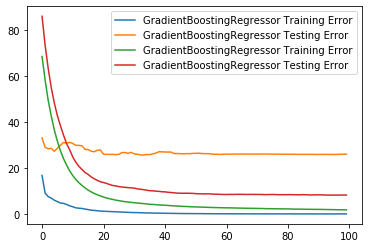

In [192]:
gdbr = GradientBoostingRegressor(learning_rate=1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

stage_score_plot(gdbr, X_train, y_train, X_test, y_test)



gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)
stage_score_plot(gdbr, X_train, y_train, X_test, y_test)

GDBR beats RF at:  50


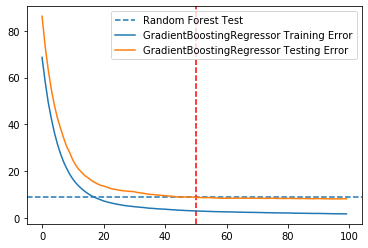

In [193]:
gdbr = GradientBoostingRegressor(learning_rate=0.1,
                                  loss='ls',
                                  n_estimators=100,
                                  random_state=1)

rf.fit(X_train, y_train)
res = rf.predict(X_test)

plt.axhline(mean_squared_error(y_test, res), ls = '--', label = 'Random Forest Test')


r = gdbr.fit(X_train, y_train) 
pred_test = list(r.staged_predict(X_test))
score_test = np.zeros(len(pred_test))

for n,i in enumerate(pred_test):
        
        score_test[n] = gdbr.loss_(y_test, pred_test[n])
        
        if score_test[n] < mean_squared_error(y_test, res):
        
            plt.axvline(n, ls = '--', c = 'red')
            break
    


print('GDBR beats RF at: ',n)
stage_score_plot(gdbr, X_train, y_train, X_test, y_test)


AdaBoost beats RF at:  35


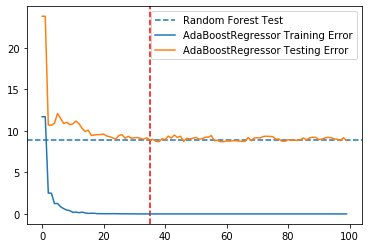

In [195]:
abr = AdaBoostRegressor(DecisionTreeRegressor(),
                         learning_rate=0.1,
                         loss='linear',
                         n_estimators=100,
                         random_state=1)

rf.fit(X_train, y_train)
res = rf.predict(X_test)

plt.axhline(mean_squared_error(y_test, res), ls = '--', label = 'Random Forest Test')


r = abr.fit(X_train, y_train) 
pred_test = list(r.staged_predict(X_test))
score_test = np.zeros(len(pred_test))

for n,i in enumerate(pred_test):
        
        score_test[n] = mean_squared_error(y_test, pred_test[n])
        
        if score_test[n] < mean_squared_error(y_test, res):
        
            plt.axvline(n, ls = '--', c = 'red')
            break
    


print('AdaBoost beats RF at: ',n)
stage_score_plot(abr, X_train, y_train, X_test, y_test)

In [204]:
random_forest_grid = {'max_depth': [3, None],
                      'max_features': ['sqrt', 'log2', None],
                      'min_samples_split': [2, 4],
                      'min_samples_leaf': [1, 2, 4],
                      'bootstrap': [True, False],
                      'n_estimators': [10, 20, 40, 80],
                      'random_state': [1]}

rf_gridsearch = GridSearchCV(RandomForestRegressor(),
                             random_forest_grid,
                             n_jobs=-1,
                             verbose=True,
                             scoring='neg_mean_squared_error')
rf_gridsearch.fit(X_train, y_train)

print("best parameters:", rf_gridsearch.best_params_)

best_rf_model = rf_gridsearch.best_estimator_

/Library/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done 536 tasks      | elapsed:    7.6s


best parameters: {'bootstrap': True, 'max_depth': None, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 40, 'random_state': 1}


[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:   13.1s finished
/Library/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:813: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
